In [17]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats

In [18]:
# Load the dataset
df = pd.read_csv("C:/Users/victus/Data_Science/New folder/EDA1/Cardiotocographic.csv")
df
 

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [19]:
df.head(5)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [21]:
# Step 5: Handle missing values by imputing with the mean value for numeric columns
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

# Verify missing values after imputation
df_imputed.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [22]:
df_imputed.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Treat outliers using Z-scores (optional, but can be applied if needed)

In [23]:
z_scores = np.abs(stats.zscore(df_imputed.select_dtypes(include=[np.number])))  # Calculate Z-scores
df_imputed = df_imputed[(z_scores < 3).all(axis=1)]  # Remove outliers with Z-score > 3

Generate statistical summary for numerical columns and Calculate the interquartile range for each variable

In [24]:
df_imputed.describe()


iqr = df_imputed.quantile(0.75) - df_imputed.quantile(0.25)
iqr

LB          15.000000
AC           0.005650
FM           0.002358
UC           0.004577
DL           0.003036
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.000000
Width       61.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

Create histograms to visualize the distribution of numerical variables

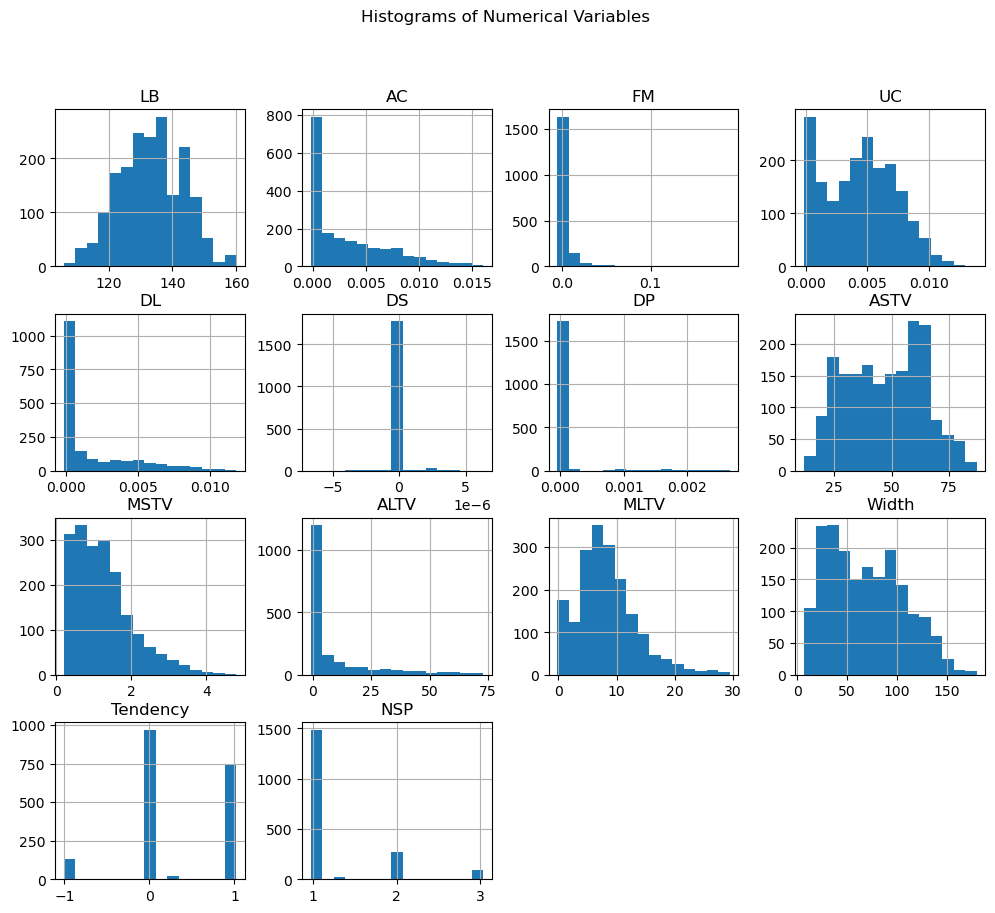

In [25]:
df_imputed.hist(bins=15, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()


Create boxplots to visualize the presence of outliers

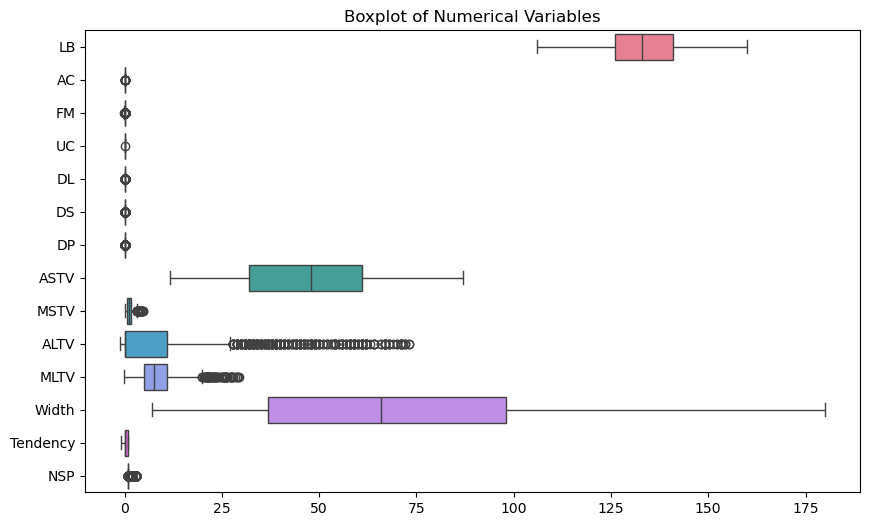

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_imputed, orient='h')
plt.title('Boxplot of Numerical Variables')
plt.show()

Create a correlation heatmap to visualize relationships between features

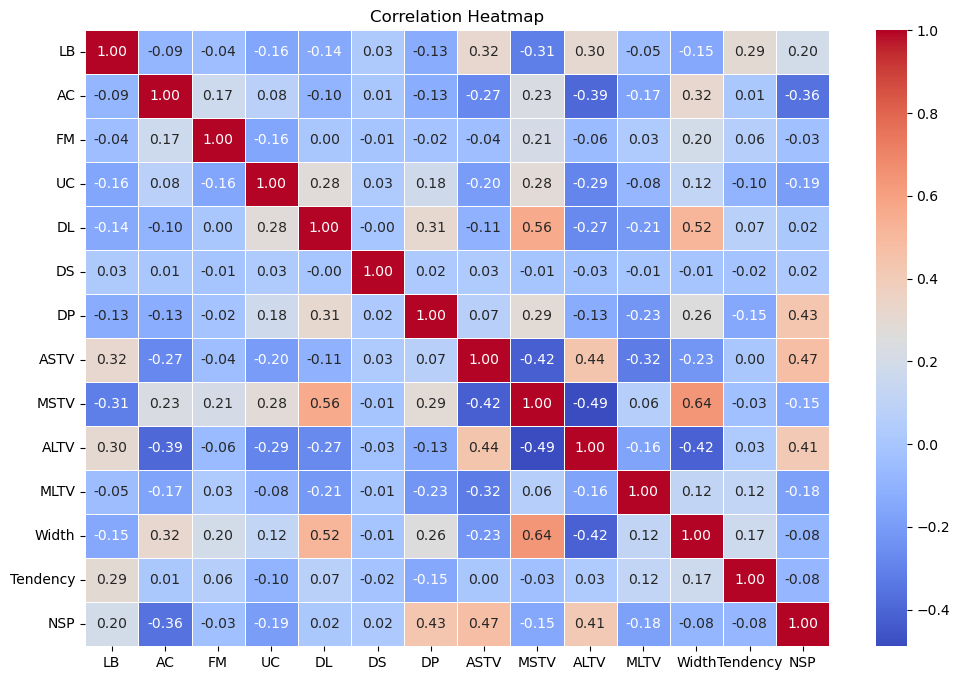

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Create a pairplot to explore relationships between multiple variables

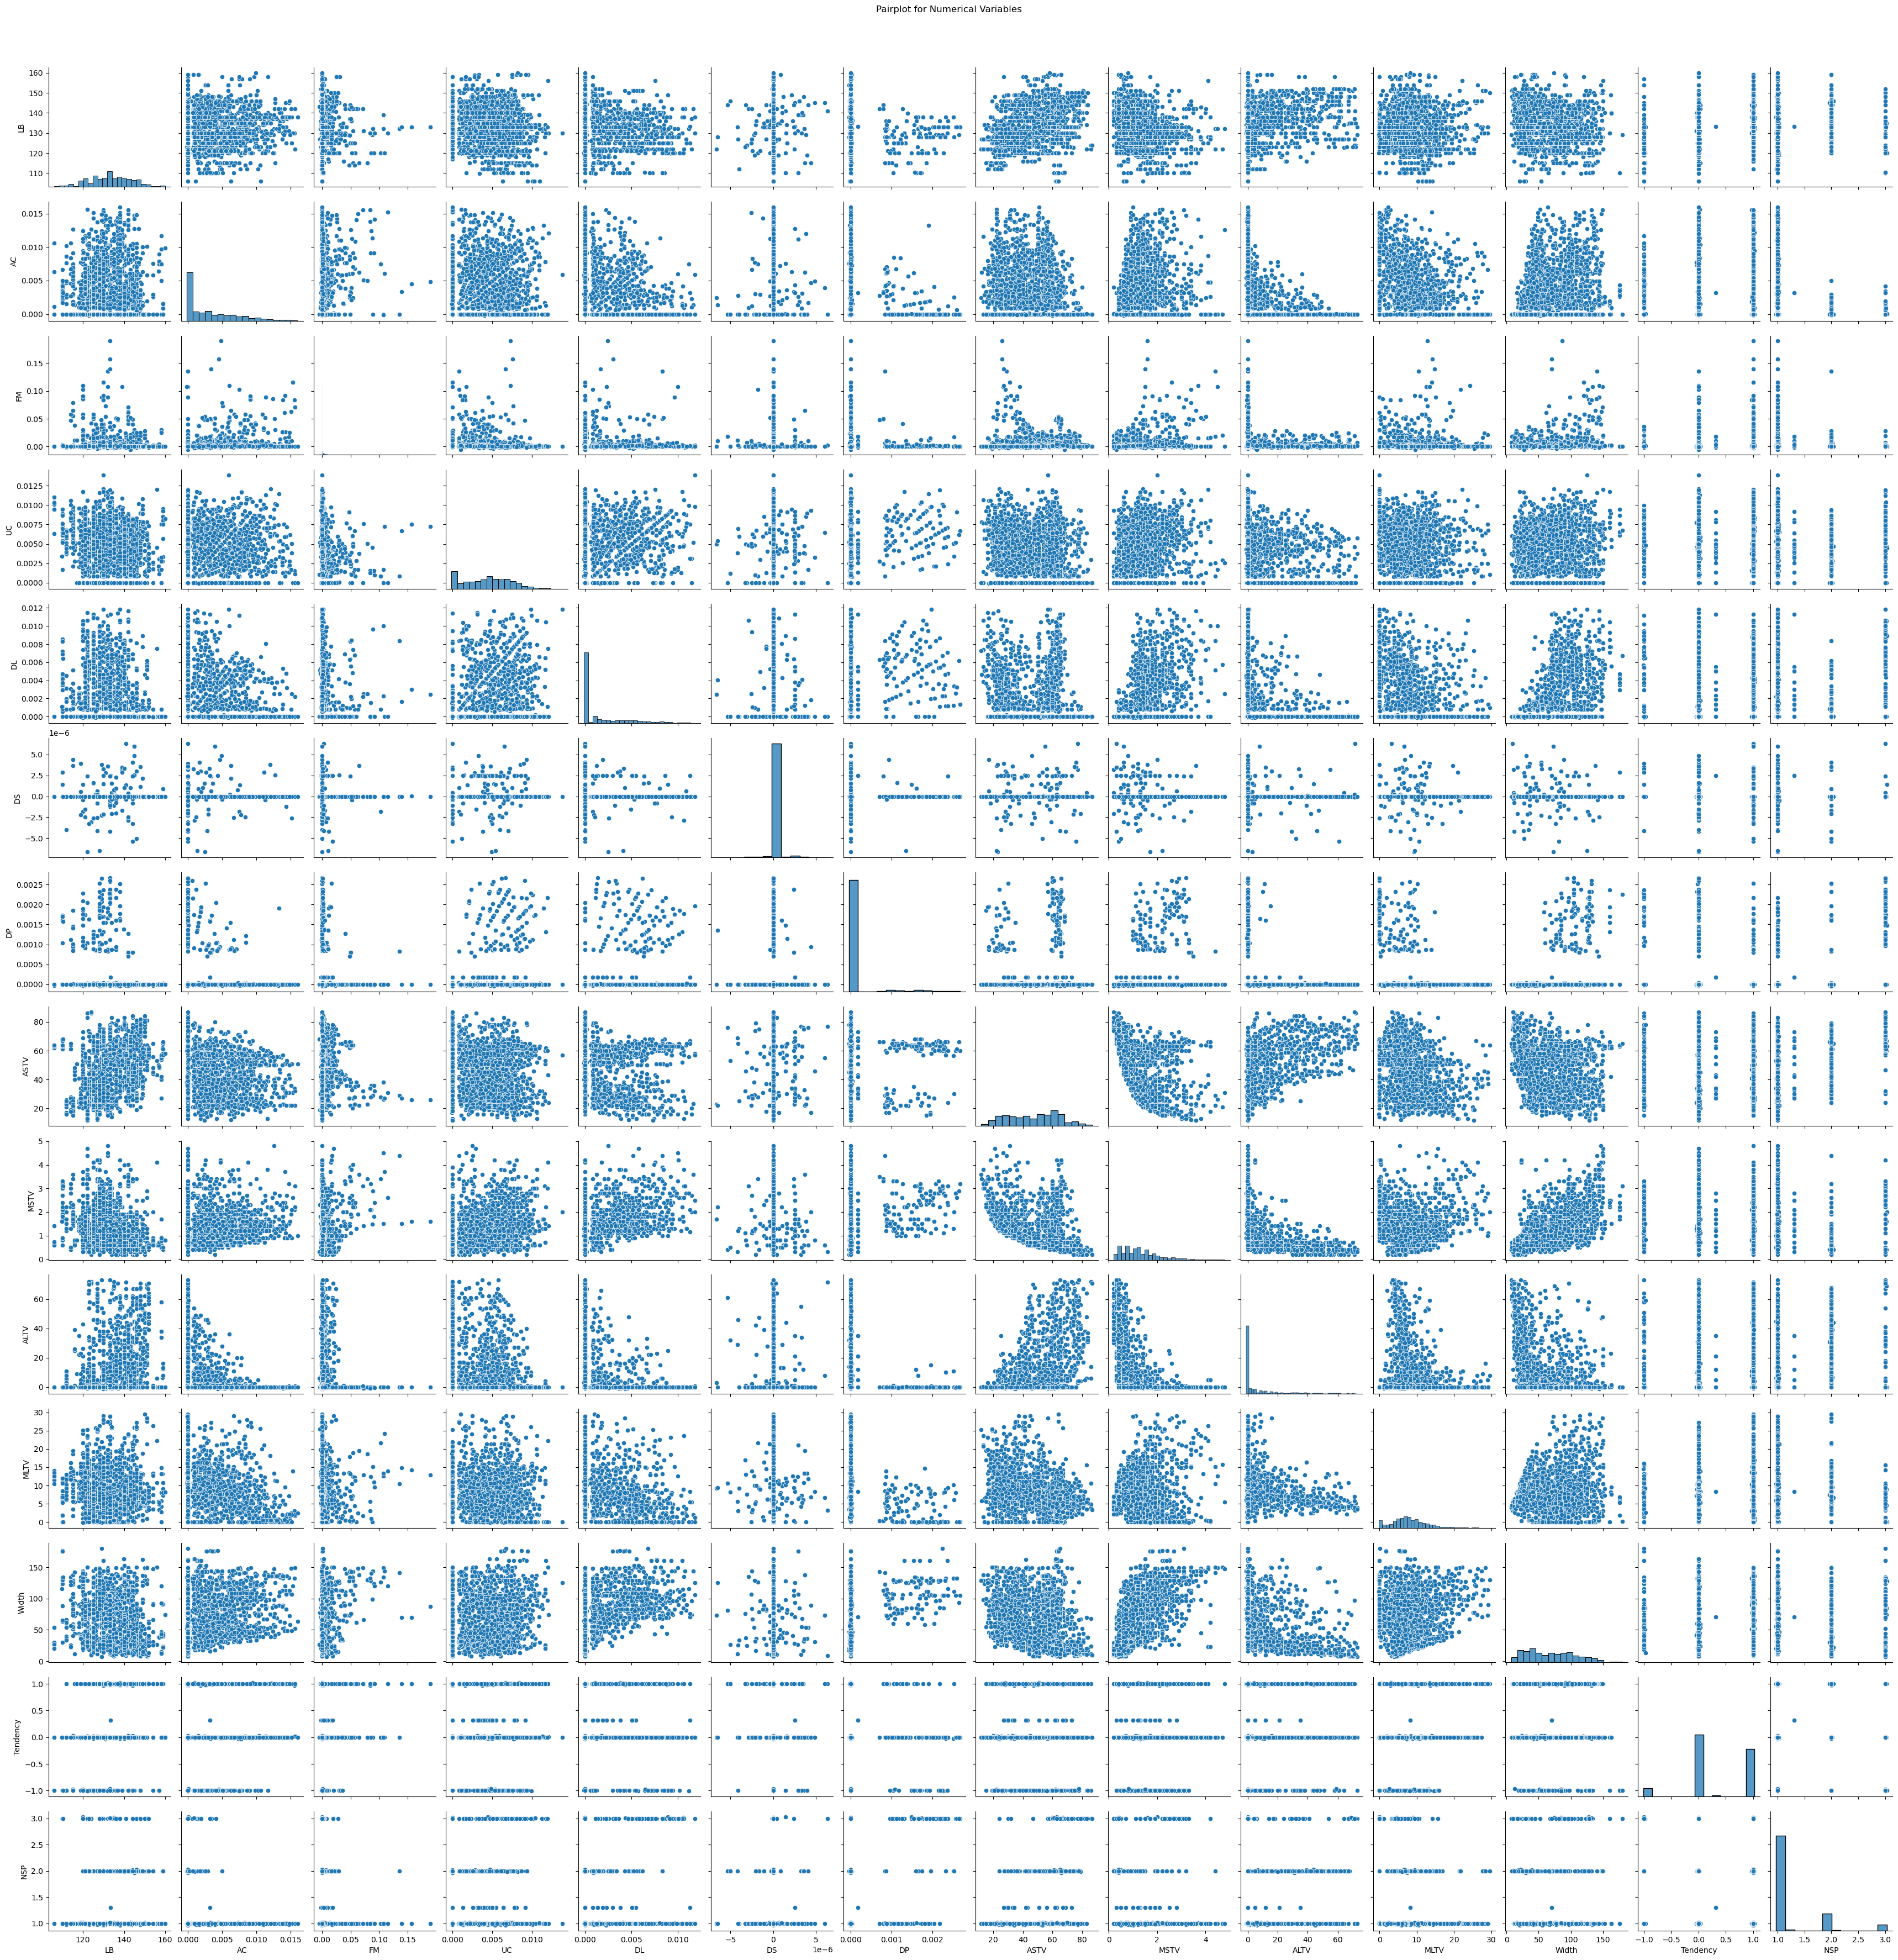

In [28]:
sns.pairplot(df_imputed)
plt.suptitle('Pairplot for Numerical Variables', y=1.02)
plt.show()


Create a violin plot for deeper insights into the distribution of specific features

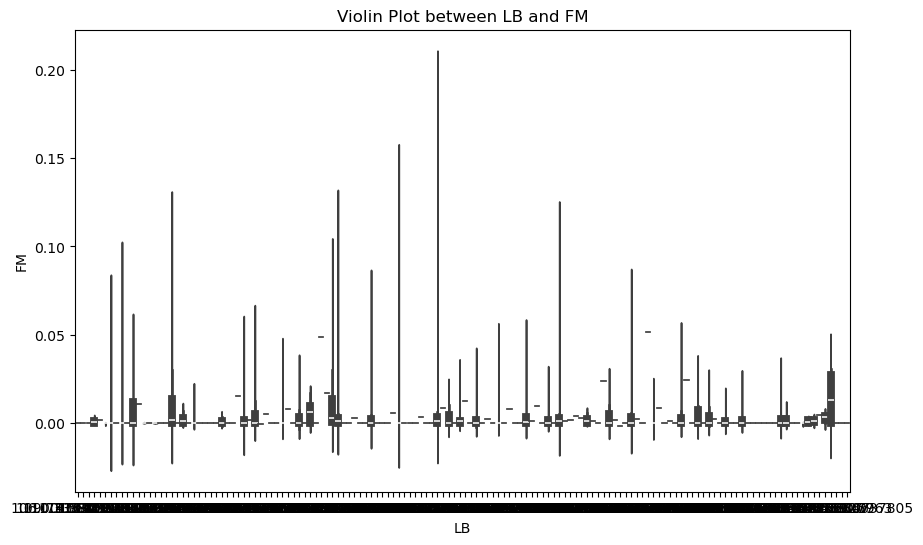

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_imputed, x='LB', y='FM')
plt.title('Violin Plot between LB and FM')
plt.show()
